In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [ ]:
columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-Num', 'Marital-Status',
           'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss',
           'Hours-Per-Week', 'Native-Country', 'Income']

In [ ]:
df = pd.read_csv(url, header = None, names = columns, skipinitialspace = True)

In [ ]:
df

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.describe()

,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-Gain    32561 non-null  int64 
 11  Capital-Loss    32561 non-null  int64 
 12  Hours-Per-Week  32561 non-null  int64 
 13  Native-Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
duplicates_before = len(df)

df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

duplicates_removed = duplicates_before - len(df)

print(f"Duplicates Removed: {duplicates_removed}")

Duplicates Removed: 24


In [ ]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-Num     0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-Per-Week    0
Native-Country    0
Income            0
dtype: int64

In [ ]:
df

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


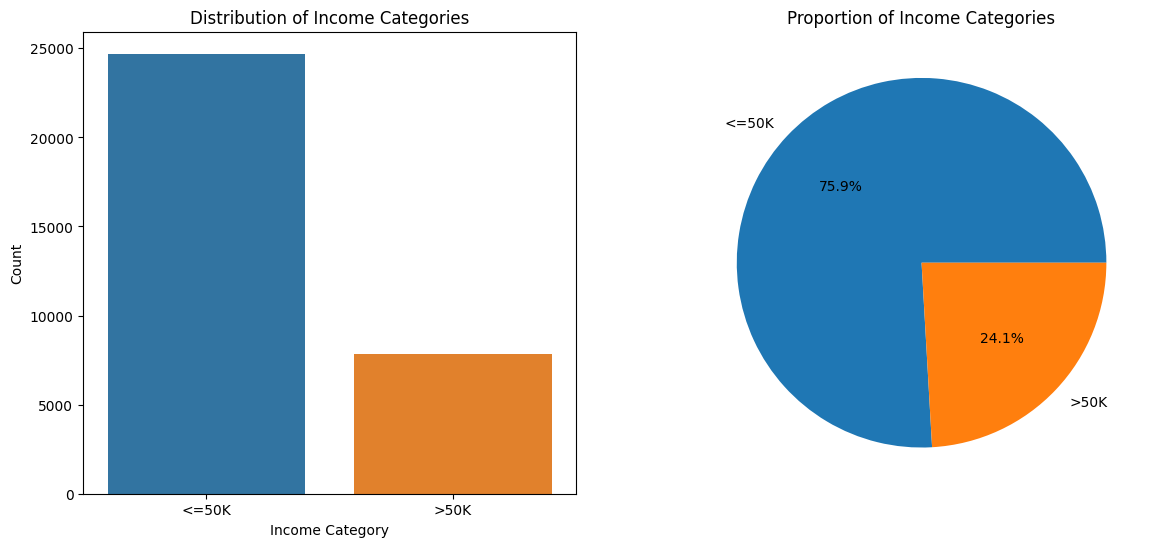

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Income', data = df)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')

plt.subplot(1, 2, 2)
income_counts = df['Income'].value_counts()
plt.pie(income_counts, labels = income_counts.index, autopct = '%1.1f%%')
plt.title('Proportion of Income Categories')

plt.show()

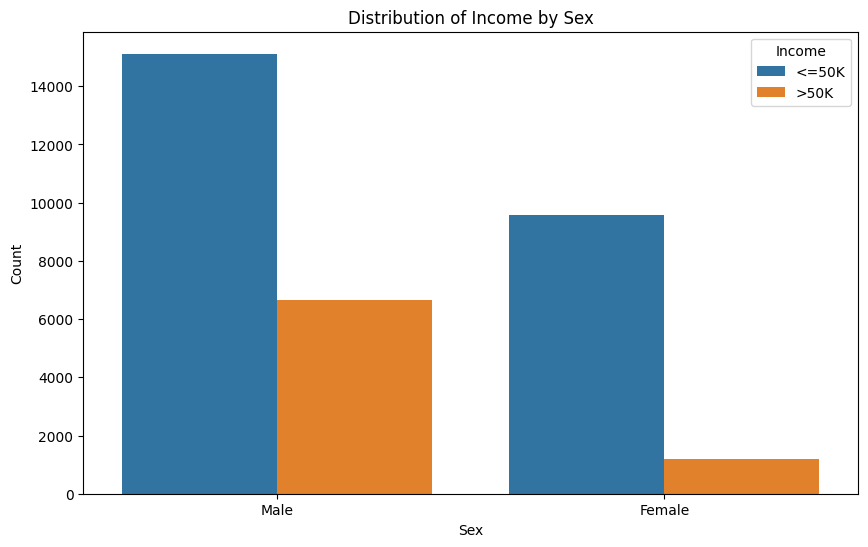

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(x='Sex', hue='Income', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Income by Sex')
plt.show()

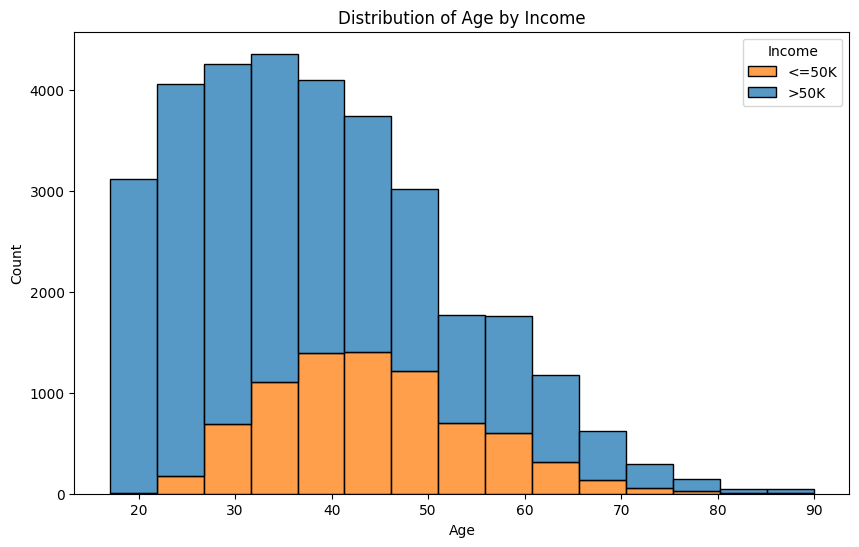

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Age', bins = 15, hue = 'Income', multiple = 'stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Income')
plt.legend(title = 'Income', loc = 'upper right', labels = ['<=50K', '>50K'])
plt.show()

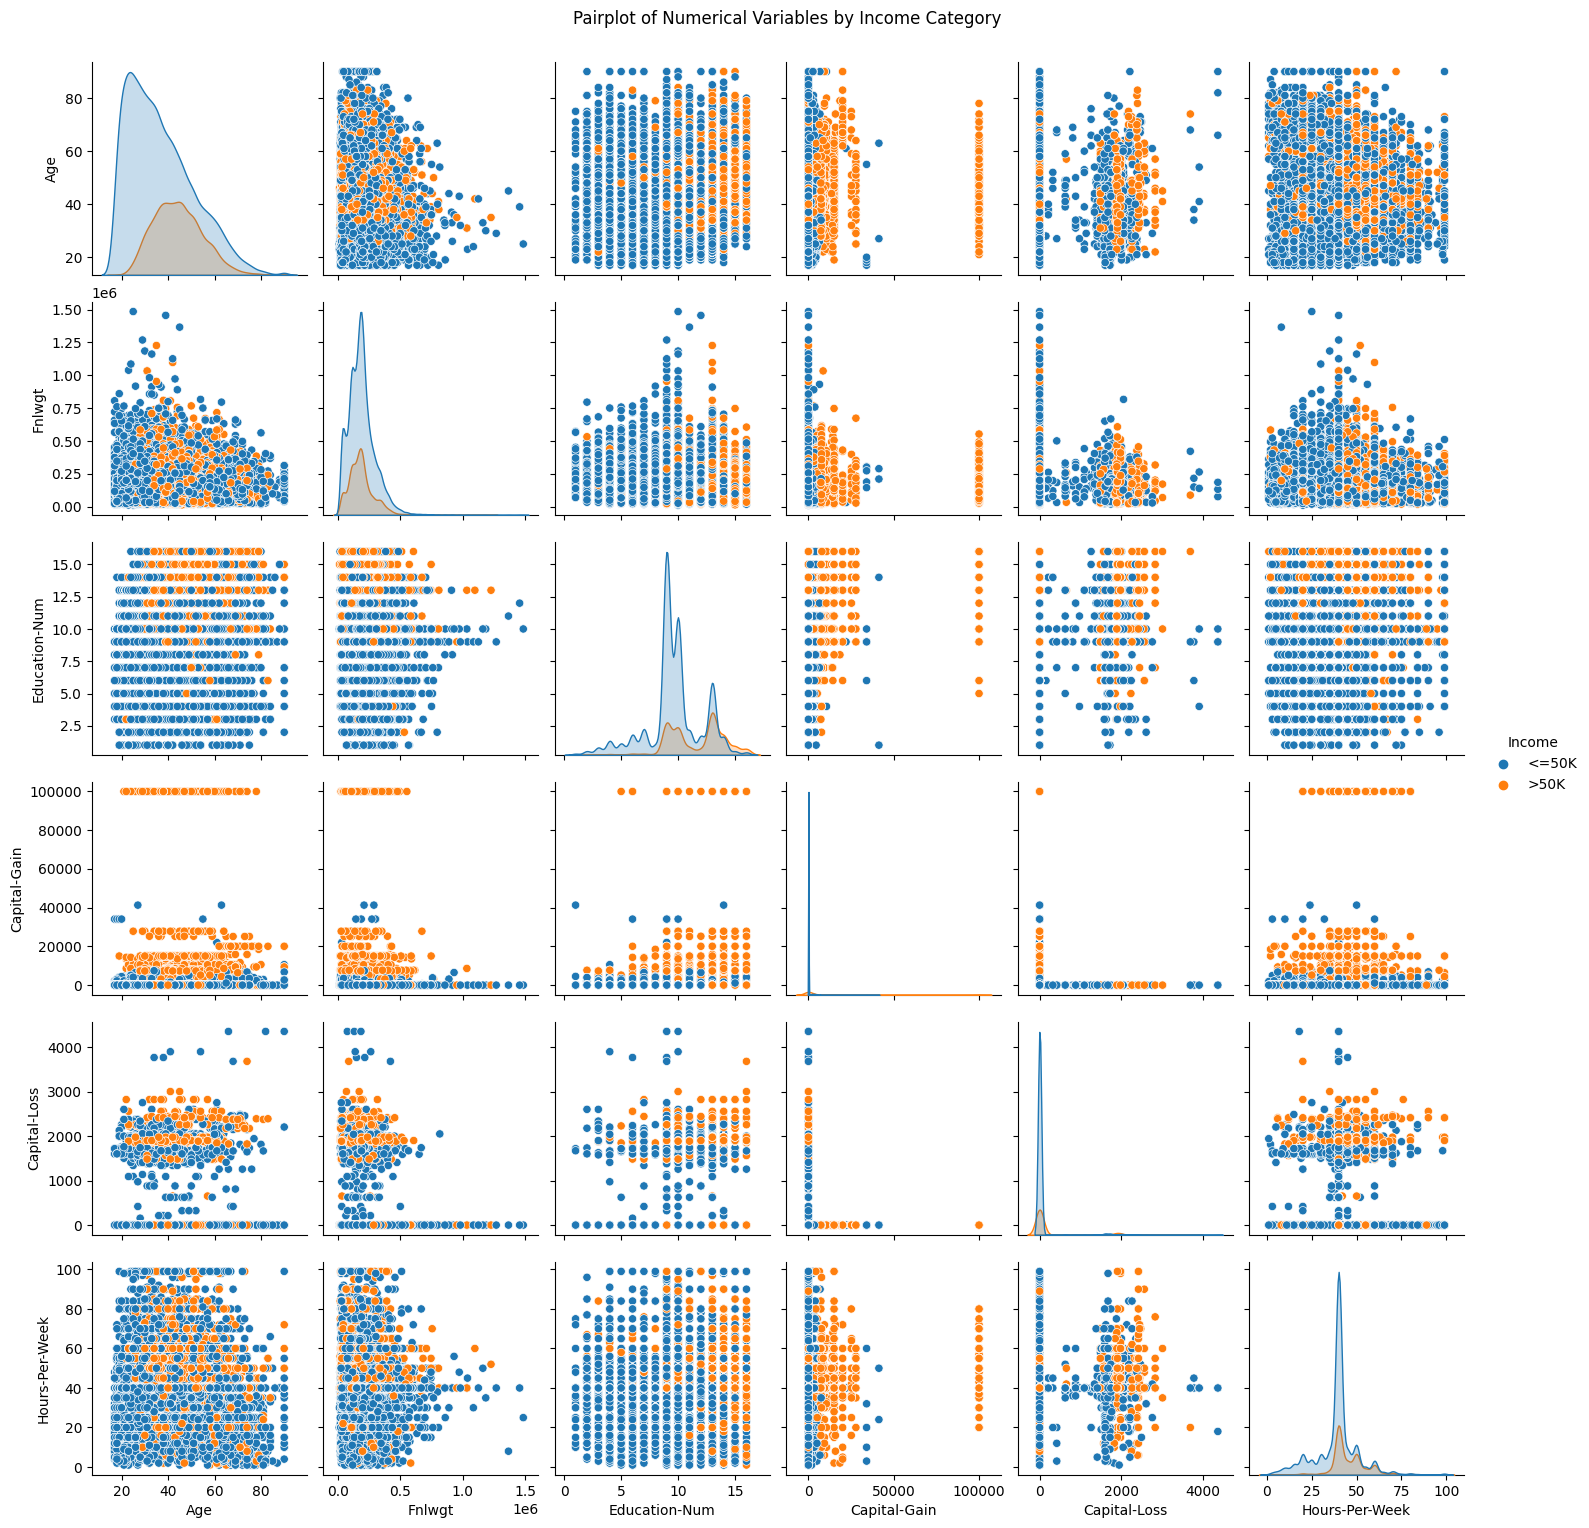

In [ ]:
sns.pairplot(df, hue = 'Income', diag_kind = 'kde')
plt.suptitle('Pairplot of Numerical Variables by Income Category', y = 1.02)
plt.show()

<ipython-input-15-71e432050bc2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


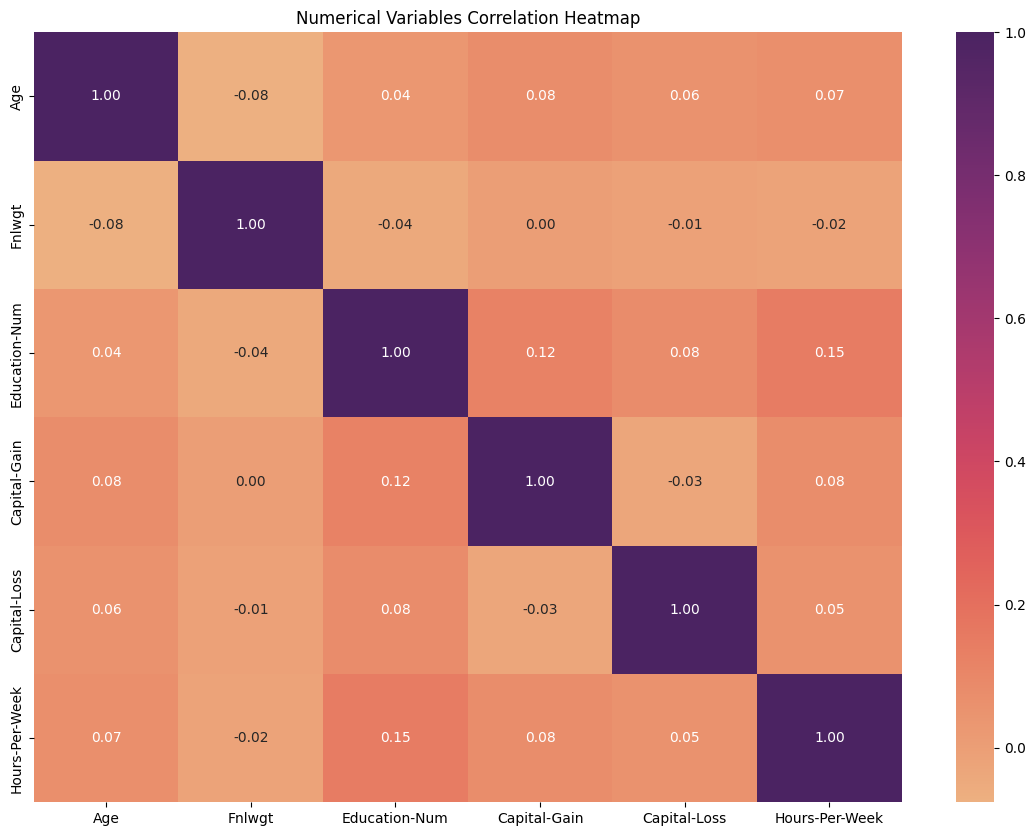

In [ ]:
plt.figure(figsize = (14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'flare', fmt = ".2f")
plt.title('Numerical Variables Correlation Heatmap')
plt.show()

In [ ]:
(df == '?').sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-Num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-Per-Week       0
Native-Country     582
Income               0
dtype: int64

In [ ]:
rows_before = len(df)

df.drop(df[df.apply(lambda row: '?' in row.values, axis=1)].index, inplace = True)
df.reset_index(drop = True, inplace = True)

rows_removed = rows_before - len(df)

print(f"Rows with '?' Values Removed: {rows_removed}")

Rows with '?' Values Removed: 2398


In [ ]:
df

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
encoder = LabelEncoder()
scaler = MinMaxScaler()

In [ ]:
df_processed = df.copy()

In [ ]:
categorical_columns = df_processed.select_dtypes(include = ['object']).columns
numerical_columns = df_processed.select_dtypes(include = ['number']).columns

In [ ]:
df_processed[categorical_columns] = df_processed[categorical_columns].apply(encoder.fit_transform)

In [ ]:
df_processed

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
30135,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
30136,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
30137,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30139 entries, 0 to 30138
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30139 non-null  int64
 1   Workclass       30139 non-null  int64
 2   Fnlwgt          30139 non-null  int64
 3   Education       30139 non-null  int64
 4   Education-Num   30139 non-null  int64
 5   Marital-Status  30139 non-null  int64
 6   Occupation      30139 non-null  int64
 7   Relationship    30139 non-null  int64
 8   Race            30139 non-null  int64
 9   Sex             30139 non-null  int64
 10  Capital-Gain    30139 non-null  int64
 11  Capital-Loss    30139 non-null  int64
 12  Hours-Per-Week  30139 non-null  int64
 13  Native-Country  30139 non-null  int64
 14  Income          30139 non-null  int64
dtypes: int64(15)
memory usage: 3.4 MB


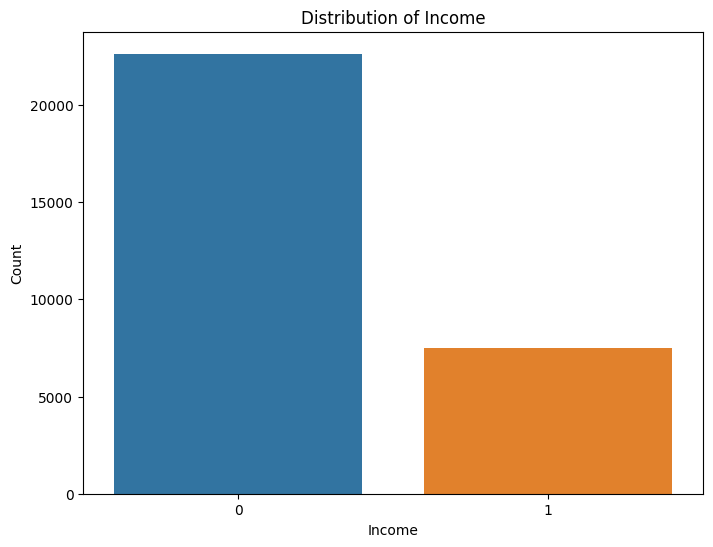

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Income', data = df_processed)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()

In [ ]:
x = df_processed.drop("Income", axis = 1)
y = df_processed["Income"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 0)

In [ ]:
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

In [ ]:
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_train), y = y_train)

class_weight_dict = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}

In [ ]:
dt_model = DecisionTreeClassifier(class_weight = class_weight_dict, random_state = 0)

In [ ]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.6658145553241179,
                                     1: 2.00770841263799},
                       random_state=0)

In [ ]:
y_pred = dt_model.predict(x_test)

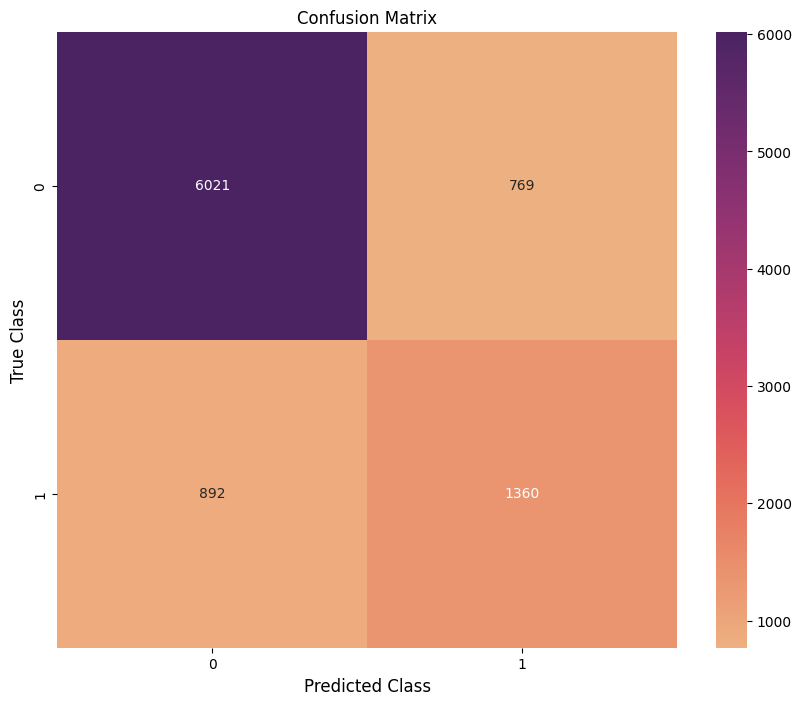

In [ ]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cm, cmap = 'flare',annot = True, fmt = 'd')

plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.63%


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6790
           1       0.64      0.60      0.62      2252

    accuracy                           0.82      9042
   macro avg       0.75      0.75      0.75      9042
weighted avg       0.81      0.82      0.81      9042



In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation ='relu', input_dim = x_train.shape[1]))
model.add(tf.keras.layers.Dense(2, activation ='softmax'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 274 (1.07 KB)
Trainable params: 274 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,
                    verbose = 2,
                    epochs = 25,
                    batch_size = 150,
                    validation_data = (x_test, y_test),
                    class_weight = class_weight_dict)

Epoch 1/25
141/141 - 1s - loss: 0.9692 - accuracy: 0.4794 - val_loss: 0.7359 - val_accuracy: 0.5213 - 1s/epoch - 10ms/step
Epoch 2/25
141/141 - 0s - loss: 0.6773 - accuracy: 0.5770 - val_loss: 0.6990 - val_accuracy: 0.5401 - 346ms/epoch - 2ms/step
Epoch 3/25
141/141 - 0s - loss: 0.6334 - accuracy: 0.6244 - val_loss: 0.6061 - val_accuracy: 0.6677 - 337ms/epoch - 2ms/step
Epoch 4/25
141/141 - 0s - loss: 0.6121 - accuracy: 0.6566 - val_loss: 0.5826 - val_accuracy: 0.6689 - 419ms/epoch - 3ms/step
Epoch 5/25
141/141 - 0s - loss: 0.5944 - accuracy: 0.6562 - val_loss: 0.5936 - val_accuracy: 0.6506 - 395ms/epoch - 3ms/step
Epoch 6/25
141/141 - 0s - loss: 0.5766 - accuracy: 0.6544 - val_loss: 0.5603 - val_accuracy: 0.6593 - 386ms/epoch - 3ms/step
Epoch 7/25
141/141 - 0s - loss: 0.5602 - accuracy: 0.6611 - val_loss: 0.5705 - val_accuracy: 0.6489 - 389ms/epoch - 3ms/step
Epoch 8/25
141/141 - 0s - loss: 0.5422 - accuracy: 0.6661 - val_loss: 0.5602 - val_accuracy: 0.6562 - 389ms/epoch - 3ms/step
Ep

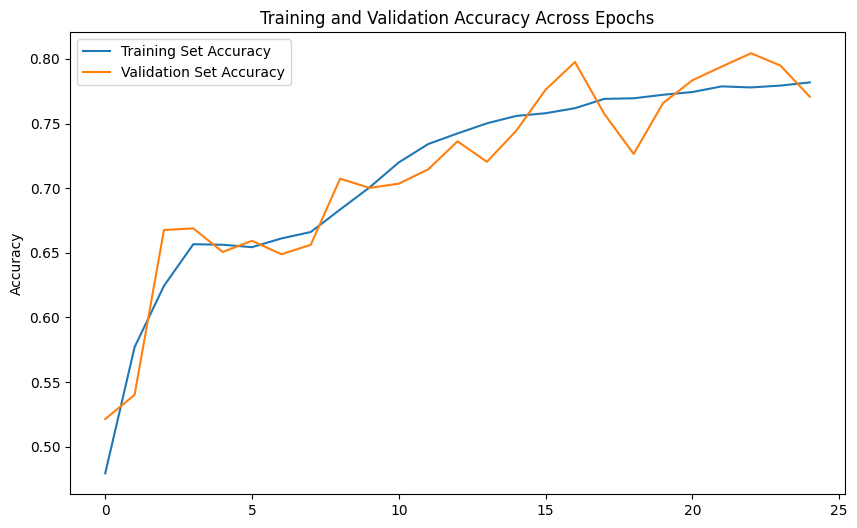

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize = (10, 6))
plt.plot(accuracy, label = 'Training Set Accuracy')
plt.plot(validation_accuracy, label = 'Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

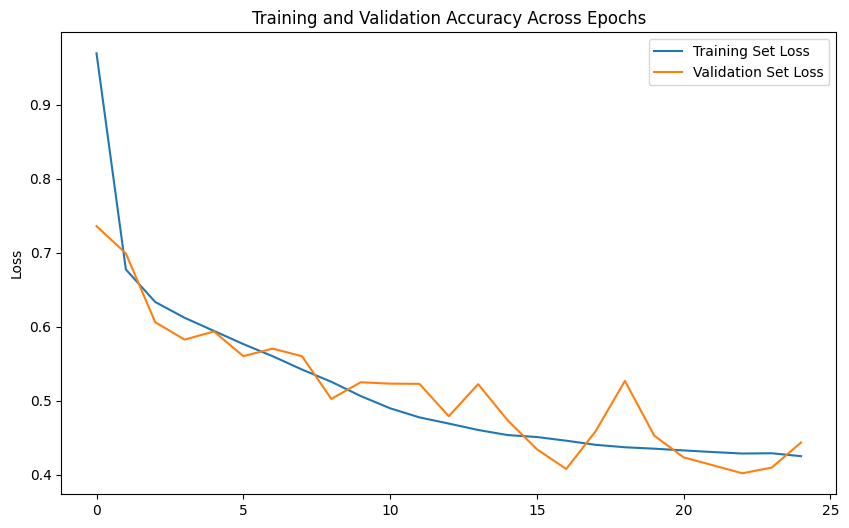

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize = (10, 6))
plt.plot(loss, label = 'Training Set Loss')
plt.plot(validation_loss, label = 'Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis = 1)

283/283 [==============================] - 1s 2ms/step


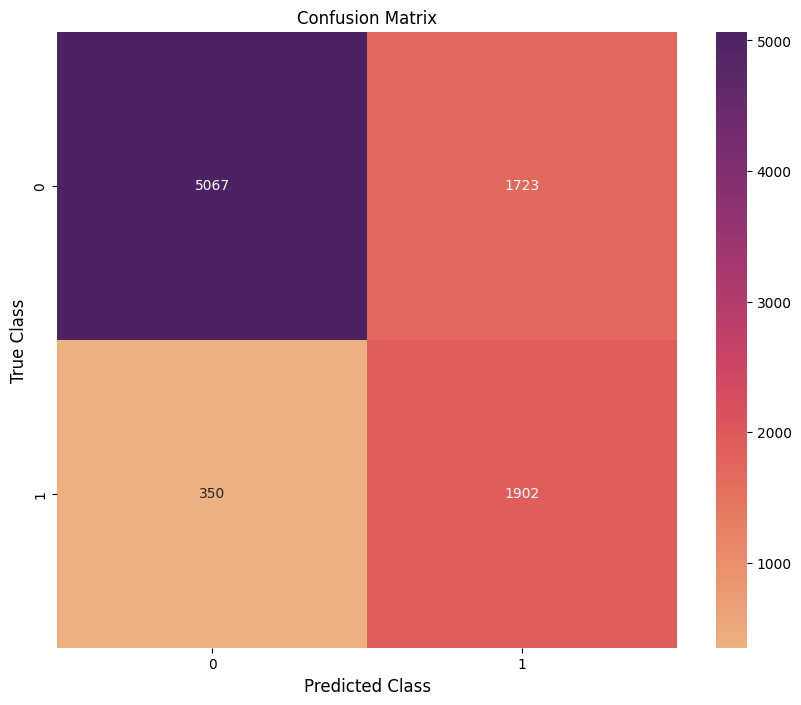

In [ ]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.07%


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      6790
           1       0.52      0.84      0.65      2252

    accuracy                           0.77      9042
   macro avg       0.73      0.80      0.74      9042
weighted avg       0.83      0.77      0.78      9042

